In [1]:
# PROBLEME 2





In [22]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt


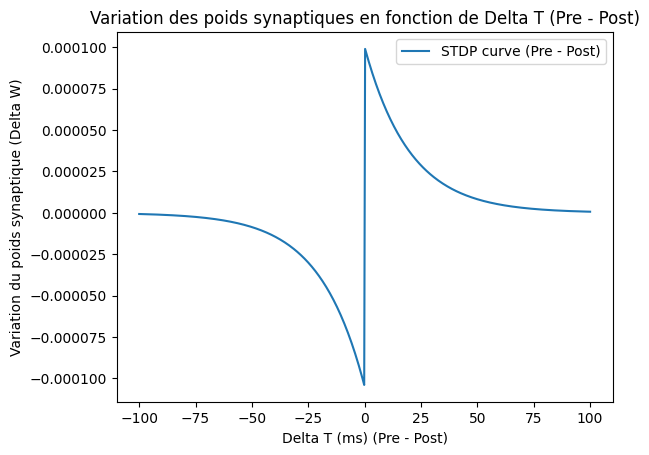

In [39]:
# Définition des paramètres de STDP





taupre = 20*ms
taupost = taupre
gmax = .01
dApre = .01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax
# Fonction pour la variation de poids en fonction de delta T (pre - post)
def delta_w(delta_t):
    if delta_t > 0:  # Le spike pré-synaptique arrive avant le spike post-synaptique
        return dApre * np.exp(-delta_t / taupre)
    else:  # Le spike post-synaptique arrive avant le spike pré-synaptique
        return dApost * np.exp(delta_t / taupost)

# Tracer Delta W en fonction de Delta T (pre - post)
delta_T_values = np.linspace(-100, 100, 500) * ms  # Intervalle de -100 ms à 100 ms
delta_W_values = [delta_w(delta_t) for delta_t in delta_T_values]

# Tracé de la courbe
figure()
plot(delta_T_values/ms, delta_W_values, label='STDP curve (Pre - Post)')
xlabel('Delta T (ms) (Pre - Post)')
ylabel('Variation du poids synaptique (Delta W)')
title('Variation des poids synaptiques en fonction de Delta T (Pre - Post)')
legend()
show()


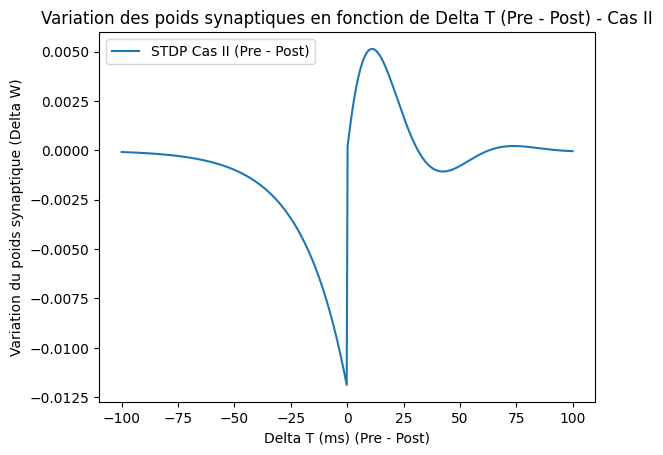

In [20]:
# Définition des paramètres de STDP pour le Cas II
taupre = 20*ms
taupost = taupre
gmax = 0.01
dApre = 0.01
dApost = -dApre * taupre / taupost * 1.2  # Légère asymétrie modifiée pour le Cas II

# Fonction pour la variation de poids en fonction de delta T (pre - post) pour le Cas II
def delta_w_case_2(delta_t):
    if delta_t > 0:  # Le spike pré-synaptique arrive avant le spike post-synaptique
        return dApre * np.exp(-delta_t / taupre) * np.sin(delta_t / (10 * ms))
    else:  # Le spike post-synaptique arrive avant le spike pré-synaptique
        return dApost * np.exp(delta_t / taupost)

# Tracer Delta W en fonction de Delta T (pre - post) pour le Cas II
delta_T_values_case_2 = np.linspace(-100, 100, 500) * ms  # Intervalle de -100 ms à 100 ms
delta_W_values_case_2 = [delta_w_case_2(delta_t) for delta_t in delta_T_values_case_2]

# Tracé de la courbe pour le Cas II
figure()
plot(delta_T_values_case_2/ms, delta_W_values_case_2, label='STDP Cas II (Pre - Post)')
xlabel('Delta T (ms) (Pre - Post)')
ylabel('Variation du poids synaptique (Delta W)')
title('Variation des poids synaptiques en fonction de Delta T (Pre - Post) - Cas II')
legend()
show()


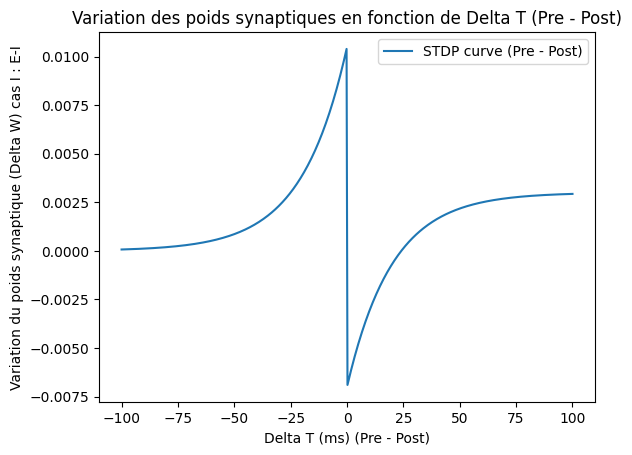

In [34]:
# Définition des paramètres de STDP
taupre = 20*ms
taupost = taupre
gmax = 0.01
dApre = 0.01
dApost = -dApre * taupre / taupost * 1.05
base_weight = 0.003

# Fonction pour la variation de poids en fonction de delta T (pre - post)
def delta_w(delta_t):
    if delta_t > 0:  # Le spike pré-synaptique arrive avant le spike post-synaptique
        return base_weight -dApre * np.exp(-delta_t / taupre)
    else:  # Le spike post-synaptique arrive avant le spike pré-synaptique
        return -dApost * np.exp(delta_t / taupost) 

# Tracer Delta W en fonction de Delta T (pre - post)
delta_T_values = np.linspace(-100, 100, 500) * ms  # Intervalle de -100 ms à 100 ms
delta_W_values = [delta_w(delta_t) for delta_t in delta_T_values]

# Tracé de la courbe
figure()
plot(delta_T_values/ms, delta_W_values, label='STDP curve (Pre - Post)')
xlabel('Delta T (ms) (Pre - Post)')
ylabel('Variation du poids synaptique (Delta W) cas I : E-I')
title('Variation des poids synaptiques en fonction de Delta T (Pre - Post)')
legend()
show()


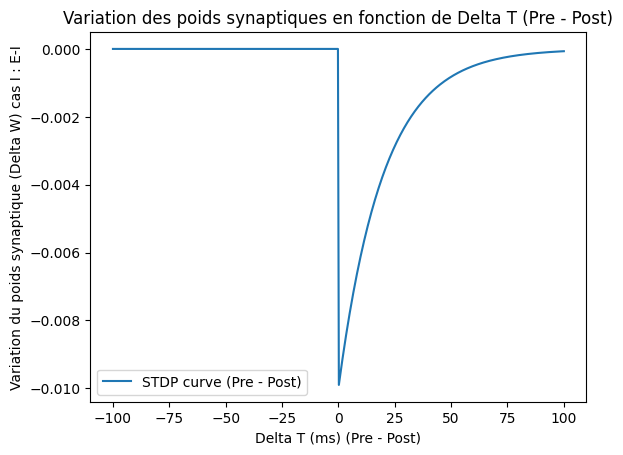

In [36]:
# Définition des paramètres de STDP
taupre = 20*ms
taupost = taupre
gmax = 0.01
dApre = 0.01
dApost = -dApre * taupre / taupost * 1.05
base_weight = 0

# Fonction pour la variation de poids en fonction de delta T (pre - post)
def delta_w(delta_t):
    if delta_t > 0:  # Le spike pré-synaptique arrive avant le spike post-synaptique
        return base_weight -dApre * np.exp(-delta_t / taupre)
    else:  # Le spike post-synaptique arrive avant le spike pré-synaptique
        return 0

# Tracer Delta W en fonction de Delta T (pre - post)
delta_T_values = np.linspace(-100, 100, 500) * ms  # Intervalle de -100 ms à 100 ms
delta_W_values = [delta_w(delta_t) for delta_t in delta_T_values]

# Tracé de la courbe
figure()
plot(delta_T_values/ms, delta_W_values, label='STDP curve (Pre - Post)')
xlabel('Delta T (ms) (Pre - Post)')
ylabel('Variation du poids synaptique (Delta W) cas I : E-I')
title('Variation des poids synaptiques en fonction de Delta T (Pre - Post)')
legend()
show()


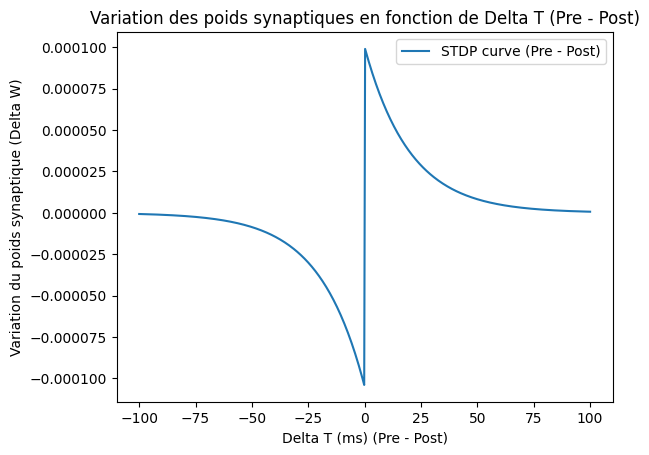

Starting simulation at t=0. s for a duration of 100. s
16.5773 s (16%) simulated in 10s, estimated 50s remaining.
33.1313 s (33%) simulated in 20s, estimated 40s remaining.
49.0602 s (49%) simulated in 30s, estimated 31s remaining.
65.6851 s (65%) simulated in 40s, estimated 21s remaining.
82.0122 s (82%) simulated in 50s, estimated 11s remaining.
98.5728 s (98%) simulated in 1m 0s, estimated 1s remaining.
100. s (100%) simulated in 1m 0s


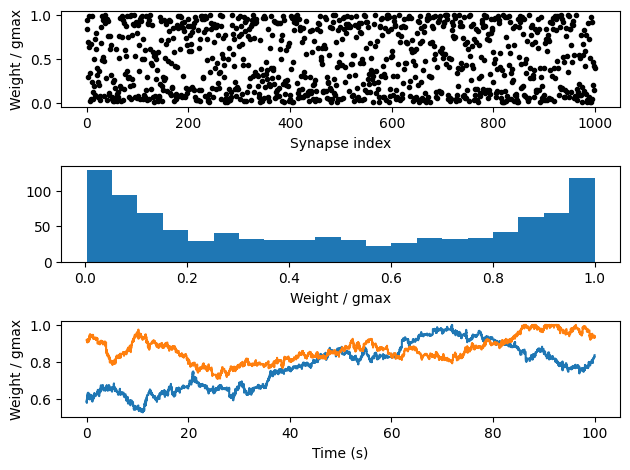

In [40]:
#2.2 Partie I du probleme : ` Etude des diff ´ erentes formes de STDP

# question 1 

#Excitateur à Excitateur — Forme I
# Nombre de neurones d'entrée
N = 1000

# Paramètres pour les neurones postsynaptiques
taum = 10*ms  # Constante de temps membranaire
taupre = 20*ms  # Constante de temps pour la trace pré-synaptique (Apre)
taupost = taupre  # Constante de temps pour la trace post-synaptique (Apost)
Ee = 0*mV  # Potentiel d'équilibre excitateur (synapses excitatrices)
vt = -54*mV  # Potentiel de seuil d'activation du neurone postsynaptique
vr = -60*mV  # Potentiel de réinitialisation après un spike
El = -74*mV  # Potentiel de repos du neurone postsynaptique
taue = 5*ms  # Constante de temps pour la dynamique des conductances excitatrices

# Fréquence de tir des neurones du groupe Poisson (en Hz)
F = 15*Hz

# Paramètres pour la STDP (Spike-Timing-Dependent Plasticity)
gmax = .01  # Poids synaptique maximal

# Facteur d'augmentation de la trace pré-synaptique (lorsqu'un spike pré-synaptique survient)
dApre = .01  

# Facteur d'augmentation de la trace post-synaptique (lorsqu'un spike post-synaptique survient)
# Apost est négatif ici car un spike post-synaptique diminue généralement le poids synaptique
dApost = -dApre * taupre / taupost * 1.05  # Légère asymétrie pour favoriser l'augmentation/diminution des poids

# On ajuste les amplitudes de Apre et Apost en fonction du poids synaptique maximal
dApost *= gmax
dApre *= gmax

def delta_w(delta_t):
    if delta_t > 0:  # Le spike pré-synaptique arrive avant le spike post-synaptique
        return dApre * np.exp(-delta_t / taupre)
    else:  # Le spike post-synaptique arrive avant le spike pré-synaptique
        return dApost * np.exp(delta_t / taupost)

# Tracer Delta W en fonction de Delta T (pre - post)
delta_T_values = np.linspace(-100, 100, 500) * ms  # Intervalle de -100 ms à 100 ms
delta_W_values = [delta_w(delta_t) for delta_t in delta_T_values]

# Tracé de la courbe
figure()
plot(delta_T_values/ms, delta_W_values, label='STDP curve (Pre - Post)')
xlabel('Delta T (ms) (Pre - Post)')
ylabel('Variation du poids synaptique (Delta W)')
title('Variation des poids synaptiques en fonction de Delta T (Pre - Post)')
legend()
show()

# Équations différentielles pour les neurones postsynaptiques
# 'v' représente le potentiel membranaire et 'ge' la conductance excitatrice
eqs_neurons = '''
dv/dt = (ge * (Ee-v) + El - v) / taum : volt  # Évolution du potentiel membranaire
dge/dt = -ge / taue : 1  # Évolution de la conductance excitatrice (ge)
'''

# Génère un groupe de neurones d'entrée avec des spikes aléatoires (Poisson)
# N : nombre de neurones, rates=F : fréquence de spikes
poisson_input = PoissonGroup(N, rates=F)

# Création du groupe de neurones postsynaptiques (ici un seul neurone)
neurons = NeuronGroup(1, eqs_neurons, threshold='v>vt', reset='v = vr',
                      method='euler')  # 'euler' est une méthode d'intégration numérique

# Définition des synapses avec la STDP entre le groupe Poisson et les neurones postsynaptiques
S = Synapses(poisson_input, neurons,
             '''w : 1  # Poids synaptique
                dApre/dt = -Apre / taupre : 1 (event-driven)  # Décroissance exponentielle de Apre
                dApost/dt = -Apost / taupost : 1 (event-driven)  # Décroissance exponentielle de Apost
             ''',
             # Lorsque le neurone pré-synaptique spike
             on_pre='''ge += w  # Ajout de la contribution excitatrice au potentiel postsynaptique
                    Apre += dApre  # Mise à jour de la trace pré-synaptique (augmente)
                    w = clip(w + Apost, 0, gmax)  # Ajustement du poids (Apost a tendance à le réduire)
                    ''',
             # Lorsque le neurone post-synaptique spike
             on_post='''Apost += dApost  # Mise à jour de la trace post-synaptique (diminue)
                     w = clip(w + Apre, 0, gmax)  # Ajustement du poids (Apre a tendance à l'augmenter)
                     ''',
             )

# Connexion complète entre tous les neurones du groupe Poisson et le neurone postsynaptique
S.connect()

# Initialisation des poids synaptiques de manière aléatoire entre 0 et gmax
S.w = 'rand() * gmax'

# Enregistrement des poids synaptiques au cours du temps pour deux synapses
mon = StateMonitor(S, 'w', record=[0, 1])  # Enregistre les poids des synapses 0 et 1
s_mon = SpikeMonitor(poisson_input)  # Enregistre les spikes du groupe Poisson

# Simulation du réseau pour 100 secondes
run(100*second, report='text')

# Affichage des résultats

# Graphique 1 : poids synaptiques finaux pour chaque synapse normalisés par gmax
subplot(311)
plot(S.w / gmax, '.k')  # Poids normalisés
ylabel('Weight / gmax')
xlabel('Synapse index')

# Graphique 2 : histogramme de la distribution des poids synaptiques
subplot(312)
hist(S.w / gmax, 20)  # Histogramme des poids normalisés
xlabel('Weight / gmax')

# Graphique 3 : évolution des poids des synapses 0 et 1 au cours du temps
subplot(313)
plot(mon.t/second, mon.w.T/gmax)  # Poids des synapses 0 et 1 normalisés par gmax
xlabel('Time (s)')
ylabel('Weight / gmax')

# Ajustement de la mise en page des graphiques
tight_layout()

# Affichage des graphiques
show()






In [ ]:
#cas 2

In [ ]:
#cas 3

In [ ]:
# cas 4

In [ ]:
# question 2
# HYPOTHESES : 
# differences de frequence : diff dans potentiel d'action et la fréquence de tir des neurones postsynaptiques.

#6 Hz : 
#pré-synaptiques auront moins d'opportunités de déclencher des spikes,
# augmentation plus faible des poids synaptiques  (peu d'apprentissage)

#15 Hz : 
#les spikes pré-synaptiques pourraient survenir si rapidement que les neurones post-synaptiques n'auraient pas suffisamment de temps pour répondre, 
# ce qui pourrait entraîner une saturation de la plasticité.,
# réduction des poids synaptiques en raison de la prévalence des spikes post-synaptiques. (effet de plafonnement).

#10 Hz
# bon equilibre




In [ ]:
# question 3
# HYPOTHESES : 

#Normalisation des poids synaptiques 
#Intégration d'une fenêtre temporelle adaptative

